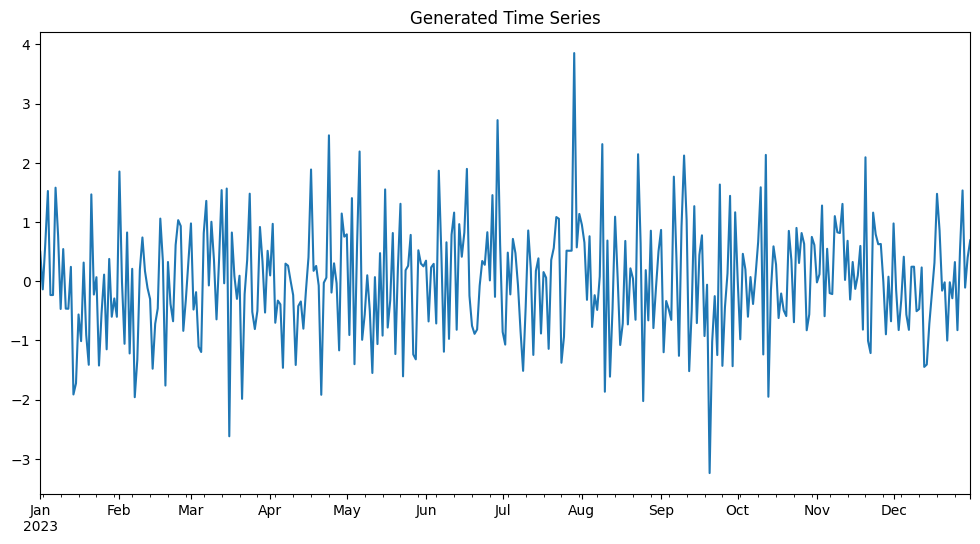

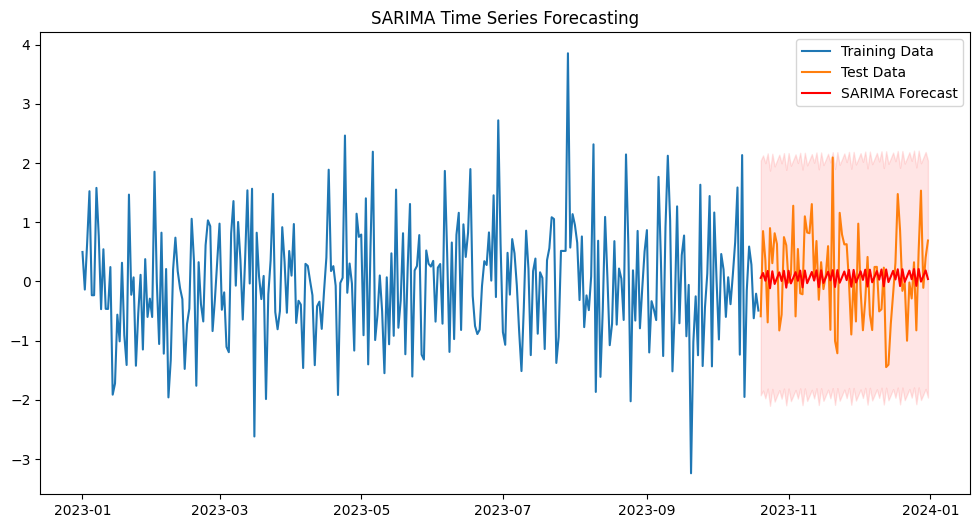

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Generate a sample time series
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Plot the time series
ts.plot(figsize=(12, 6), title='Generated Time Series')
plt.show()

# Split the data into training and testing sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # (p, d, q) for non-seasonal part
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s) for seasonal part

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Forecast future values
forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast.predicted_mean, label='SARIMA Forecast', color='red')

# Confidence intervals
ci = forecast.conf_int()
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.title('SARIMA Time Series Forecasting')
plt.legend()
plt.show()


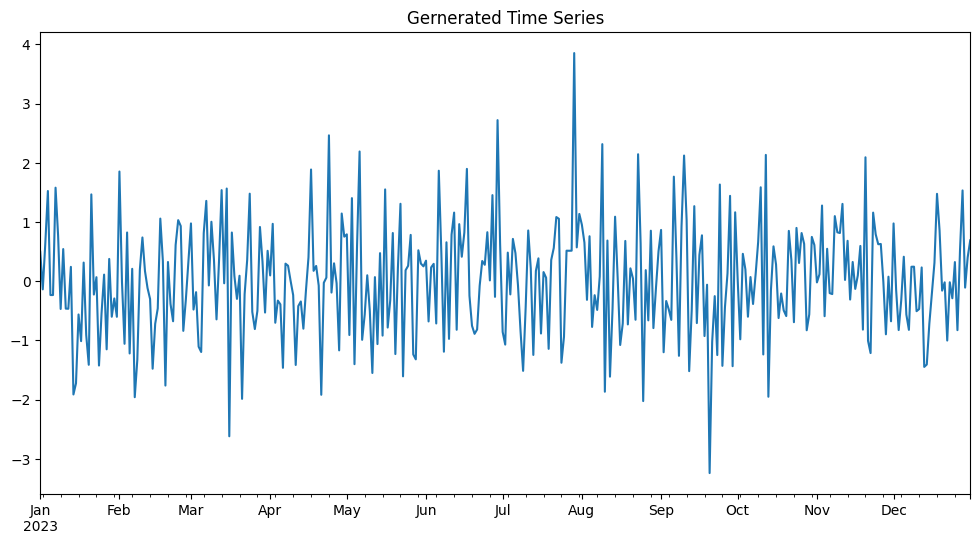

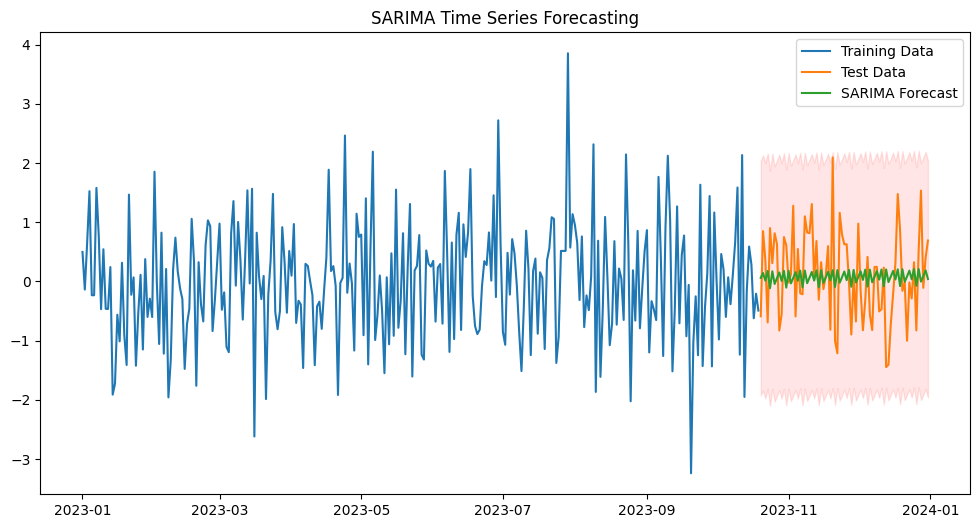

In [85]:
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
date_rng
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)
#print(ts)
ts.plot(figsize=(12, 6), title='Gernerated Time Series')
plt.show()
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

order = (1, 1, 1)  # (p, d, q) for non-seasonal part
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s) for seasonal part

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps)
#forecast.predicted_mean 

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast.predicted_mean, label='SARIMA Forecast')
ci = forecast.conf_int()
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)
plt.title('SARIMA Time Series Forecasting')
plt.legend()
plt.show()

             lower y   upper y
2023-10-20 -1.924065  2.041580
2023-10-21 -1.844768  2.127820
2023-10-22 -1.975766  1.996918
2023-10-23 -1.809920  2.162812
2023-10-24 -2.102188  1.870608
...              ...       ...
2023-12-27 -1.791503  2.208694
2023-12-28 -2.004489  1.995800
2023-12-29 -1.913688  2.089340
2023-12-30 -1.816420  2.186504
2023-12-31 -1.961851  2.041384

[73 rows x 2 columns]


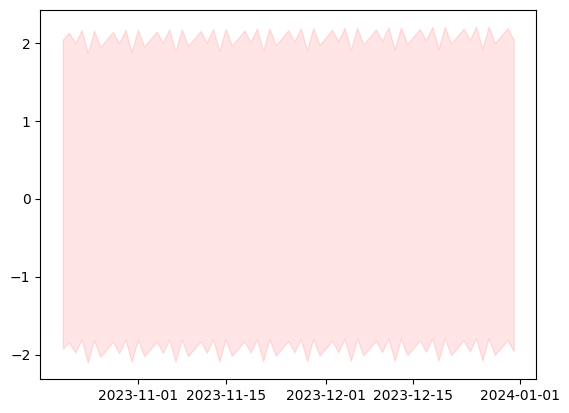

In [79]:
ci = forecast.conf_int()
print(ci)
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

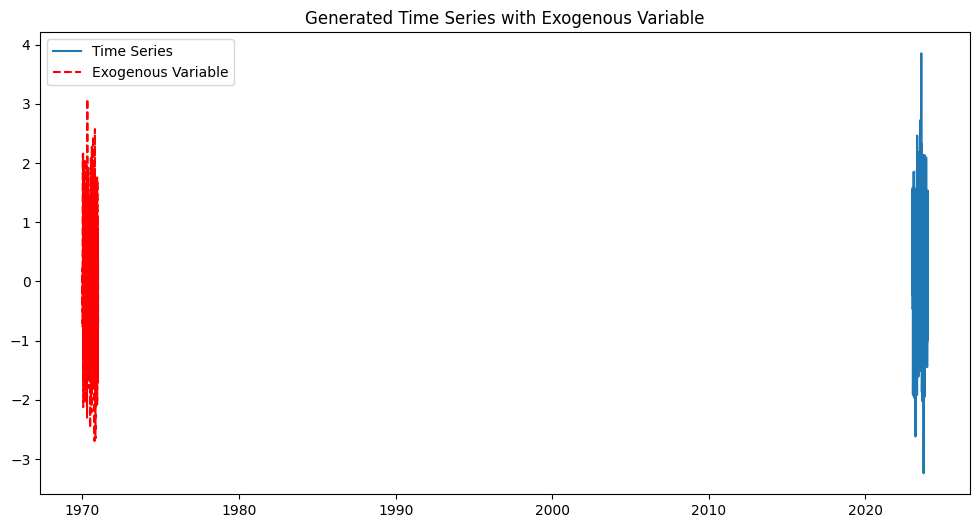

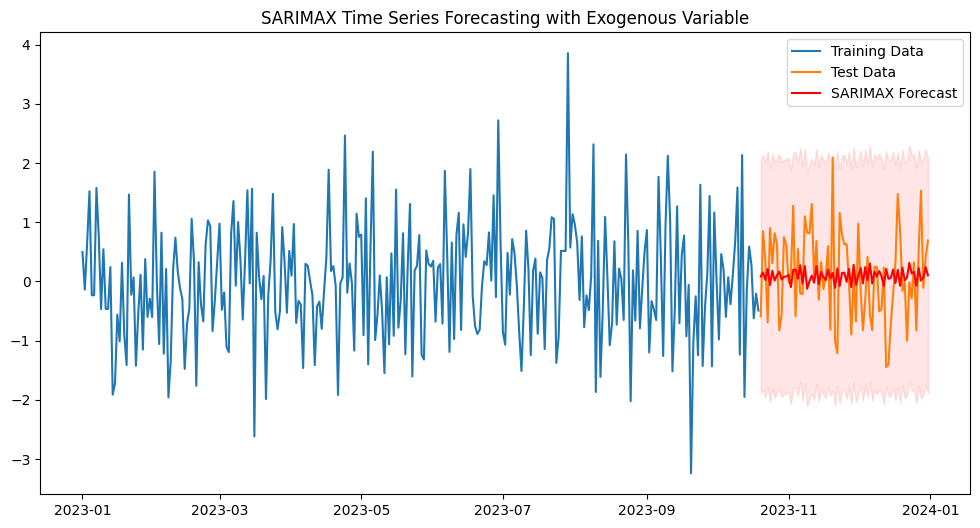

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Generate a sample time series with exogenous variable
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Generate an exogenous variable (could be any external factor influencing the time series)
exogenous_variable = np.random.randn(len(date_rng))

# Plot the time series and exogenous variable
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Time Series')
plt.plot(exogenous_variable, label='Exogenous Variable', linestyle='--', color='r')
plt.title('Generated Time Series with Exogenous Variable')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]
exog_train, exog_test = exogenous_variable[:train_size], exogenous_variable[train_size:]

# Define and fit the SARIMAX model
order = (1, 1, 1)  # (p, d, q) for non-seasonal part
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s) for seasonal part

model = SARIMAX(train, exog=exog_train, order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Forecast future values with exogenous variable
forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps, exog=exog_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast.predicted_mean, label='SARIMAX Forecast', color='red')

# Confidence intervals
ci = forecast.conf_int()
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.title('SARIMAX Time Series Forecasting with Exogenous Variable')
plt.legend()
plt.show()


In [8]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.48480491]


In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data

[1.913117976587849,
 2.628280586837443,
 3.1933414782330978,
 4.67179190866097,
 5.361704396533123,
 6.677951319050429,
 7.369632520121568,
 8.079979603512674,
 9.37530033738437,
 10.932044676890339,
 11.23522616569803,
 12.544726049588013,
 13.513115974356252,
 14.66995648351939,
 15.885687940890975,
 16.684798204598163,
 17.782233642894205,
 18.3066252750725,
 19.07153179077005,
 20.29151586438347,
 21.16823433006155,
 22.277355502297315,
 23.423143857806892,
 24.21859830255056,
 25.878959488488793,
 26.426067722655894,
 27.97757458305054,
 28.63120632641083,
 29.634049986371267,
 30.19026143907891,
 31.455949186187848,
 32.85032782074532,
 33.46514107301378,
 34.95415693732102,
 35.27844068780606,
 36.864509331524815,
 37.44462792694231,
 38.29772261856872,
 39.50757078656522,
 40.46415789589924,
 41.90785209777078,
 42.9682372612458,
 43.730928694950244,
 44.817199895960044,
 45.06890144311004,
 46.87932481768696,
 47.26296201626214,
 48.67430361339573,
 49.11963701952311,
 50.3109

In [10]:
model = SimpleExpSmoothing(data)
model_fit = model.fit()
yhat = model_fit.predict(len(data), len(data)+5)
print(yhat)

[99.48480491 99.48480491 99.48480491 99.48480491 99.48480491 99.48480491]


In [1]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.10388683]


In [13]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.57381989]


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data
model = ExponentialSmoothing(data)
model_fit = model.fit()
yhat = model_fit.predict(len(data), len(data)+5)
print(yhat)

[99.68140895 99.68140895 99.68140895 99.68140895 99.68140895 99.68140895]
